In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

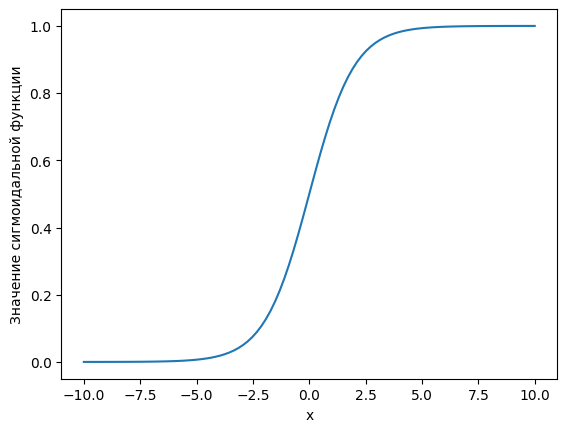

In [3]:
data = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, data))

plt.xlabel('x')
plt.ylabel('Значение сигмоидальной функции')
plt.plot(data, sigmoid_value)
plt.show()

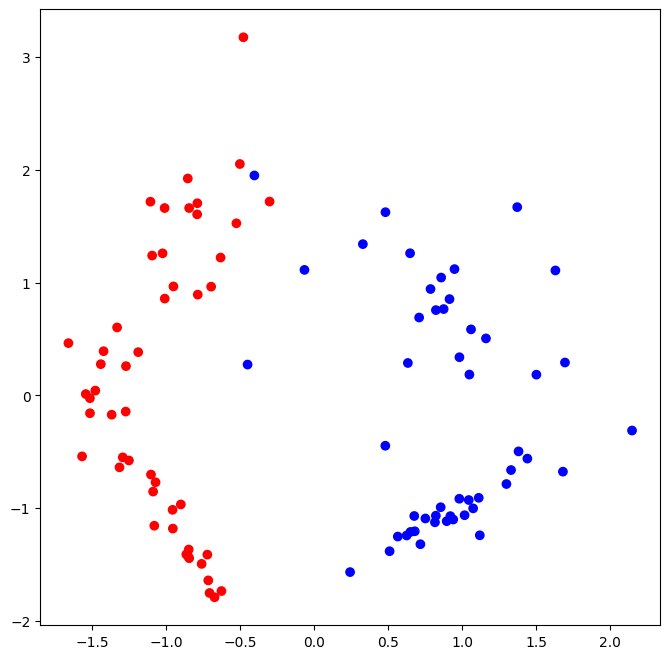

In [4]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

При работе с набором данных их рекомендуется перемешивать перед тем, как разделять на обучающую и тестовые выборки. Сделаем это.

In [5]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


Далее транспонируем матрицы данных, так как нам удобнее работать со строками.

In [ ]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

Оптимизируем функционал ошибки, используя градиентный спуск, его вид в случае использования такой функции потерь будет:

$$w_{n+1} = w_{n} - \eta \frac{1}{l}X( \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}-Y)^{T},$$

In [ ]:
def log_loss(w, X, y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X))

    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - A) * np.log(1 - A))
    loss = np.squeeze(loss)

    grad = 1.0 / m * np.dot(X, (A - y).T)

    return loss, grad

In [ ]:
def optimize(w, X, y, n_iterations, eta):
    losses = []

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)

        w = w - eta * grad

        losses.append(loss)

    return w, losses

In [ ]:
def predict(w, X, b=0.5):
    m = X.shape[1]

    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X))

    for i in range(A.shape[1]):
        if A[:, i] > b:
            y_predicted[:, i] = 1
        elif A[:, i] <= b:
            y_predicted[:, i] = 0
            
    return y_predicted

Проведём первый простой эксперимент и посмотрим на результат.

In [10]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмём долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[3.72659902]
 [0.22383415]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


Визуализируем результат и функцию потерь

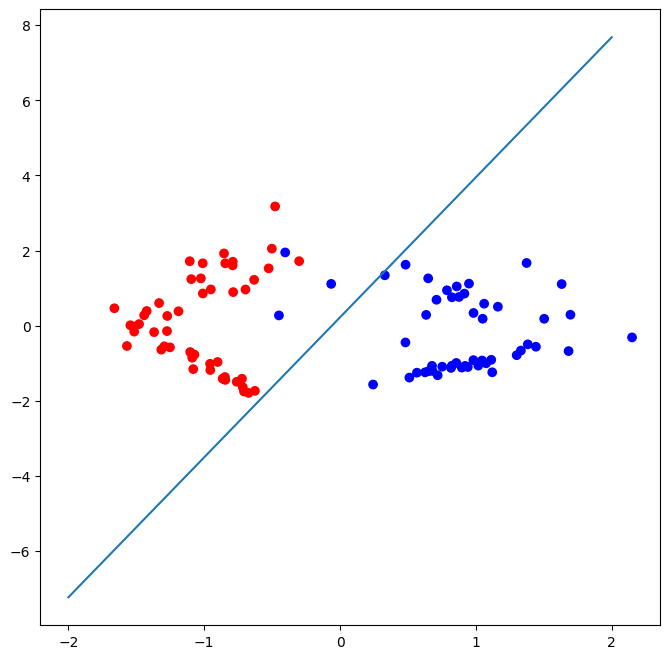

In [11]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

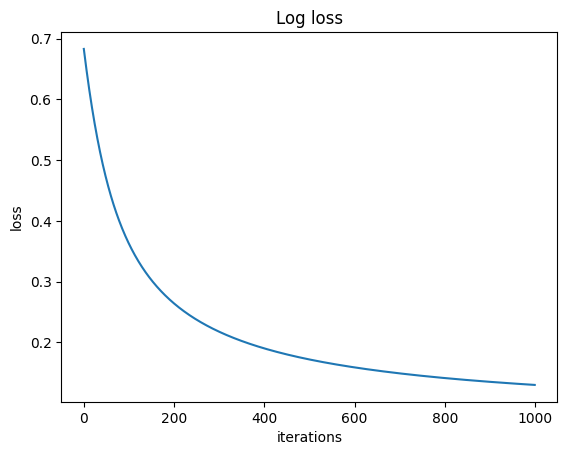

In [12]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

В заверешении подберём различные значения порога для определения точности

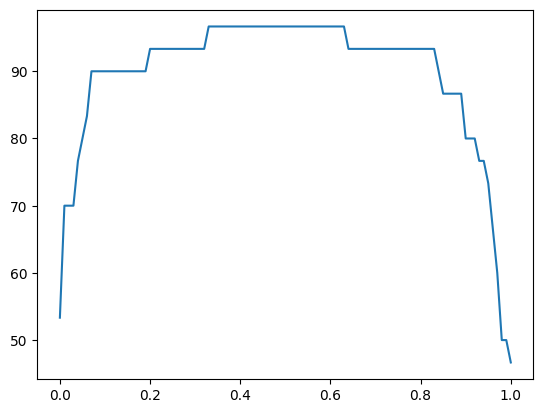

In [13]:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test_tr, b/100)
  y_predicted_train = predict(w, X_train_tr, b/100)

  # В качестве меры точности возьмём долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()